### Telecom Customer Churn Analysis, Prediction and Alleviation

Our Economy and Way of life are dependent on the telecom industry. Over the last seven years, the Indian Telecom industry has grown significantly by 9.3% year-over-year but the profit growth rate is only 4.2% year-over-year.

This difference in growth rates of revenue and profits makes it very important to address the issue of customer churn. Moreover in telecom sector, customer acquisition cost is very high compared to retaining existing customers. This makes it vital for a company to analyse its existing customer database and use it to predict churn and possibly alleviate it. 

There can be many ways to retain customers, including loyalty programs, discount coupons, vouchers, etc. We also hope to provide some suggestions regarding possible courses of action based on our results.

### Aim

In this project we are going to explore and analyze the customers database of a telecom company. We will make predict if a customer is likely to churn and give recommendations based on the probable cause to avoid churn.

### Understanding the Problem

**What is Customer Churn?**

It refers to the phenomenon when the customers of a business stop purchasing products from a business. In the case of a telecom company, churn is when a customer stops subscribing to the telephone/data plans of the company.

### Notebook Structure

This notebook is structured into two parts - 

1. Why customers churn?
2. Which customers matter?

The objectives of each section will be listed at the section's beginning.

### Next Step

In the next notebook we will work on generating predictive models for predicting churn.

### Section 1 - Why Customers Churn?

We will go complete the following objectives

1. **Define the Problem** - Clearly define what we are considering as customer churn along with terms such as churn rate and revenue churn.
2. **Identify Causes for Churning** - Find out the cause due to which customers discontinue their subscription.
3. **High-Value Customers vs Churned Customers** - These are two exclusive categories of customers. An assessment among these two customer types can be conducted to find out how churned customers can be effectively and prospectively converted to high-value customers.
   1. The former are highly valuable and loyal to the company for their large contribution to revenue generation.
   2. The latter are customers that have discontinued using our services.
4. **Furnish Recommendations** - Provide recommendations that are consistently valid and in accordance with the results we produce the above two steps.

### Import and Clean Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# check data file
df = pd.read_csv('./data/telecom_customer_churn.csv')
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [3]:
# rename column heads
df.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)
df.drop(columns = ['customer_id', 'zip_code', 'latitude', 'longitude'], inplace = True)
df.head()

,gender,age,married,number_of_dependents,city,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,Female,37,Yes,0,Frazier Park,2,9,None,Yes,42.39,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,Male,46,No,0,Glendale,0,9,None,Yes,10.69,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,33.65,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,27.82,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,Female,75,Yes,0,Camarillo,3,3,None,Yes,7.38,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [4]:
c_green = '#3A616D'
c_off_white = '#F0E4CE'
c_orange = '#FA8072'

#### 1.1 Define the Problem

An **revenue loss of 3.68M** (accounting for 17% of the total revenue) is expected due to **customer churn rate of 26.54%** (1869 out of 7043 customers). There appears to be significantly more churn among low spending customers.

In [5]:
df.total_revenue.sum()

21371131.69

In [6]:
df.customer_status.count()

7043

In [7]:
df.groupby(['customer_status'])['total_revenue'].sum()

customer_status
Churned     3684459.82
Joined        54279.75
Stayed     17632392.12
Name: total_revenue, dtype: float64

In [8]:
df.groupby(['customer_status']).size()


customer_status
Churned    1869
Joined      454
Stayed     4720
dtype: int64

#### 1.2 Identify Causes for Churning

Row labels attributed to customers who 'Joined' will not be included for analysis in order to reduce noise in the visualizations while allowing for effective visual contrast between customers who 'Churned' and those who 'Stayed'.

[Text(0.5, 0, ''), Text(0, 0.5, '')]

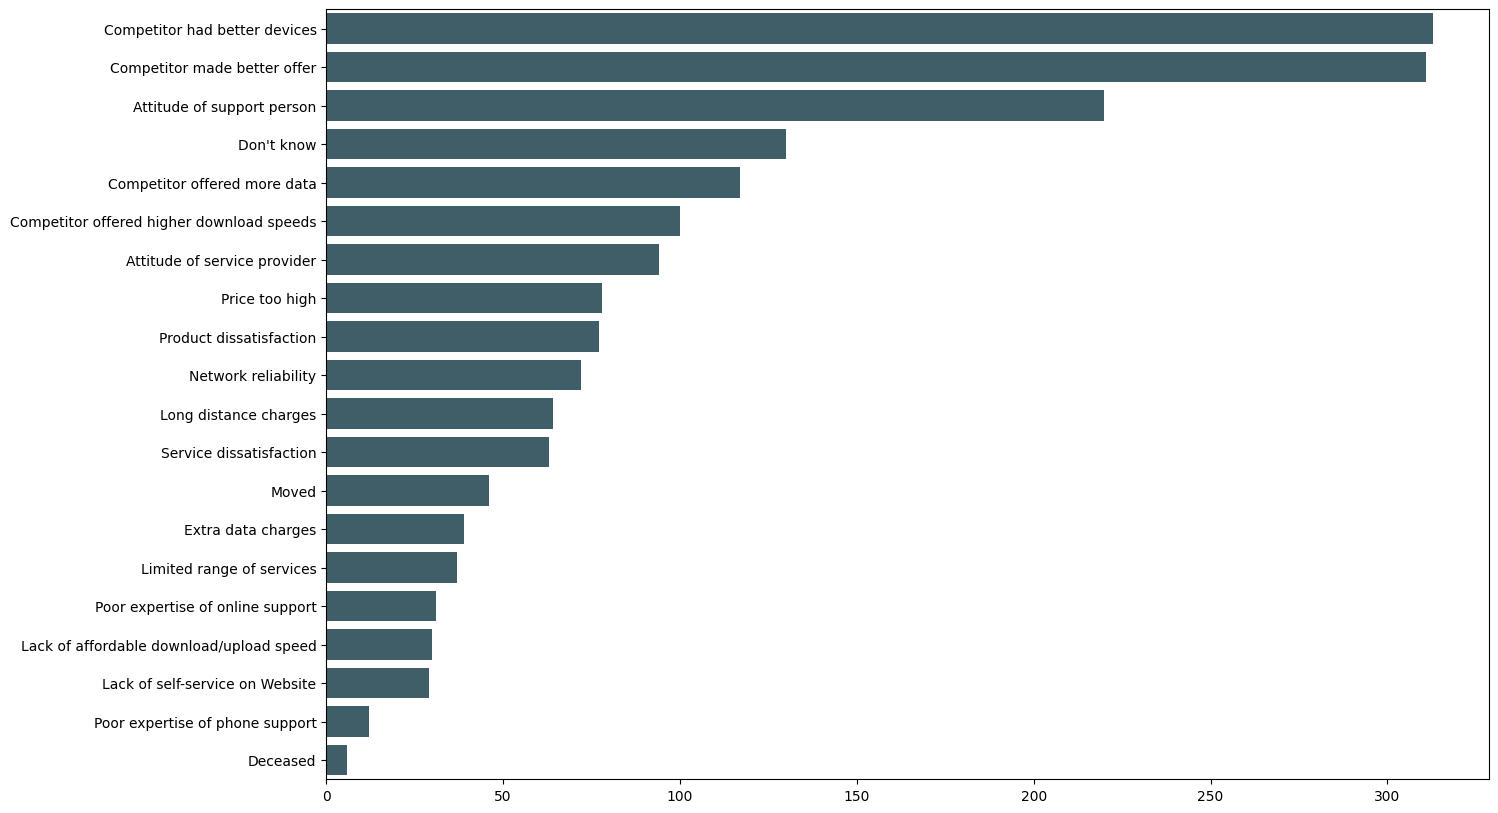

In [9]:
dfc = df.loc[df.customer_status != 'Joined']

fig = plt.figure(figsize = (15, 10))
ax = sns.countplot(data = dfc, y = dfc['churn_reason'], order = dfc['churn_reason'].value_counts().index, color = c_green)
ax.set(xlabel = None, ylabel = None)

#### Exploratory Data Analysis

Now we will perform some basic data analysis to understand the dataset better.

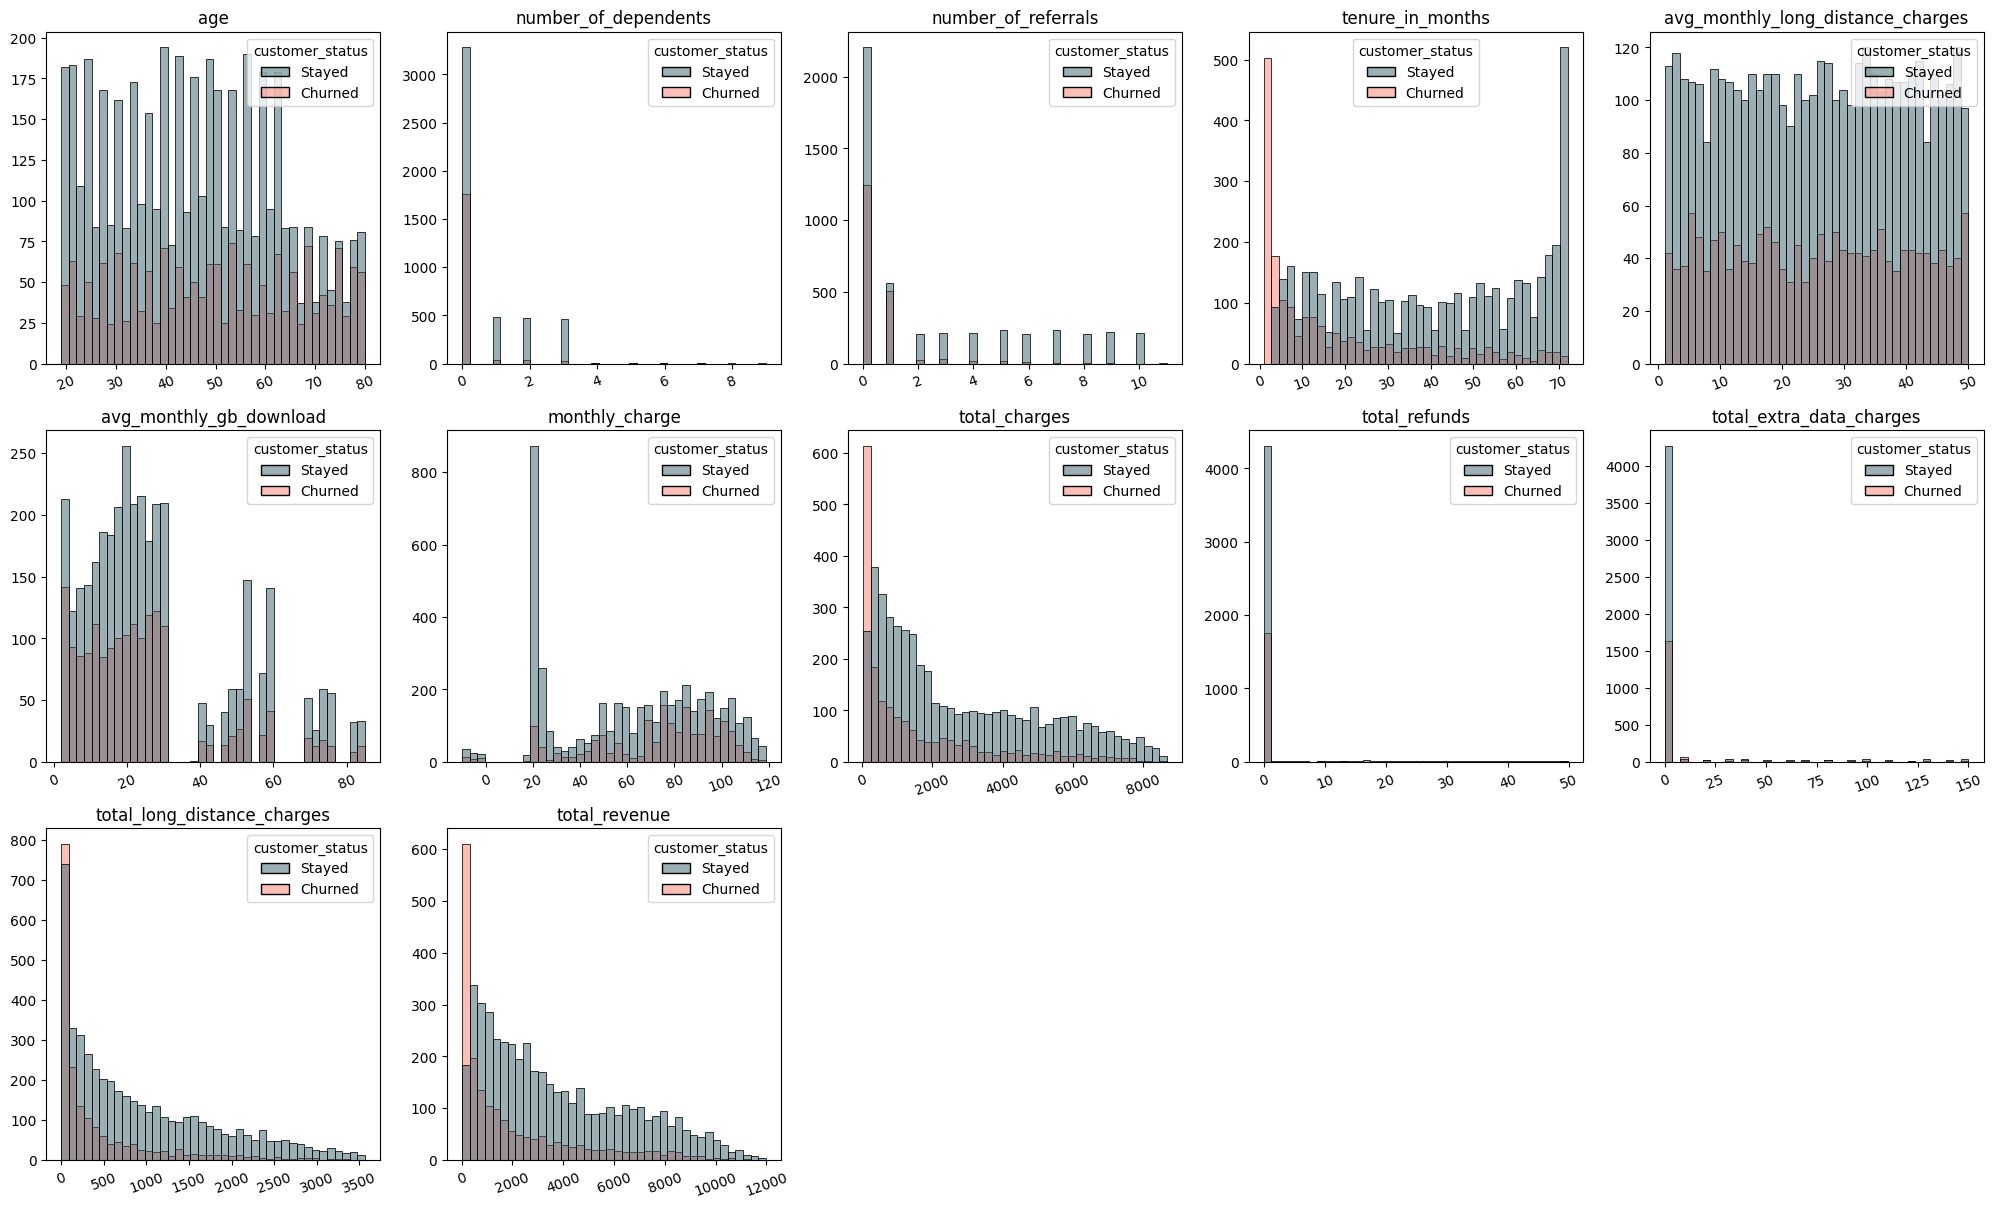

In [10]:
num = [cname for cname in dfc.columns if dfc[cname].dtype in ['int64', 'float64']]
dfc_num = dfc[num]

fig = plt.figure(figsize = (25, 25))

i = 1
for n in dfc_num.columns:
    plt.subplot(5, 5, i)
    ax = sns.histplot(x = dfc[n], hue = dfc['customer_status'], palette = [c_green, c_orange], bins = 40)
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

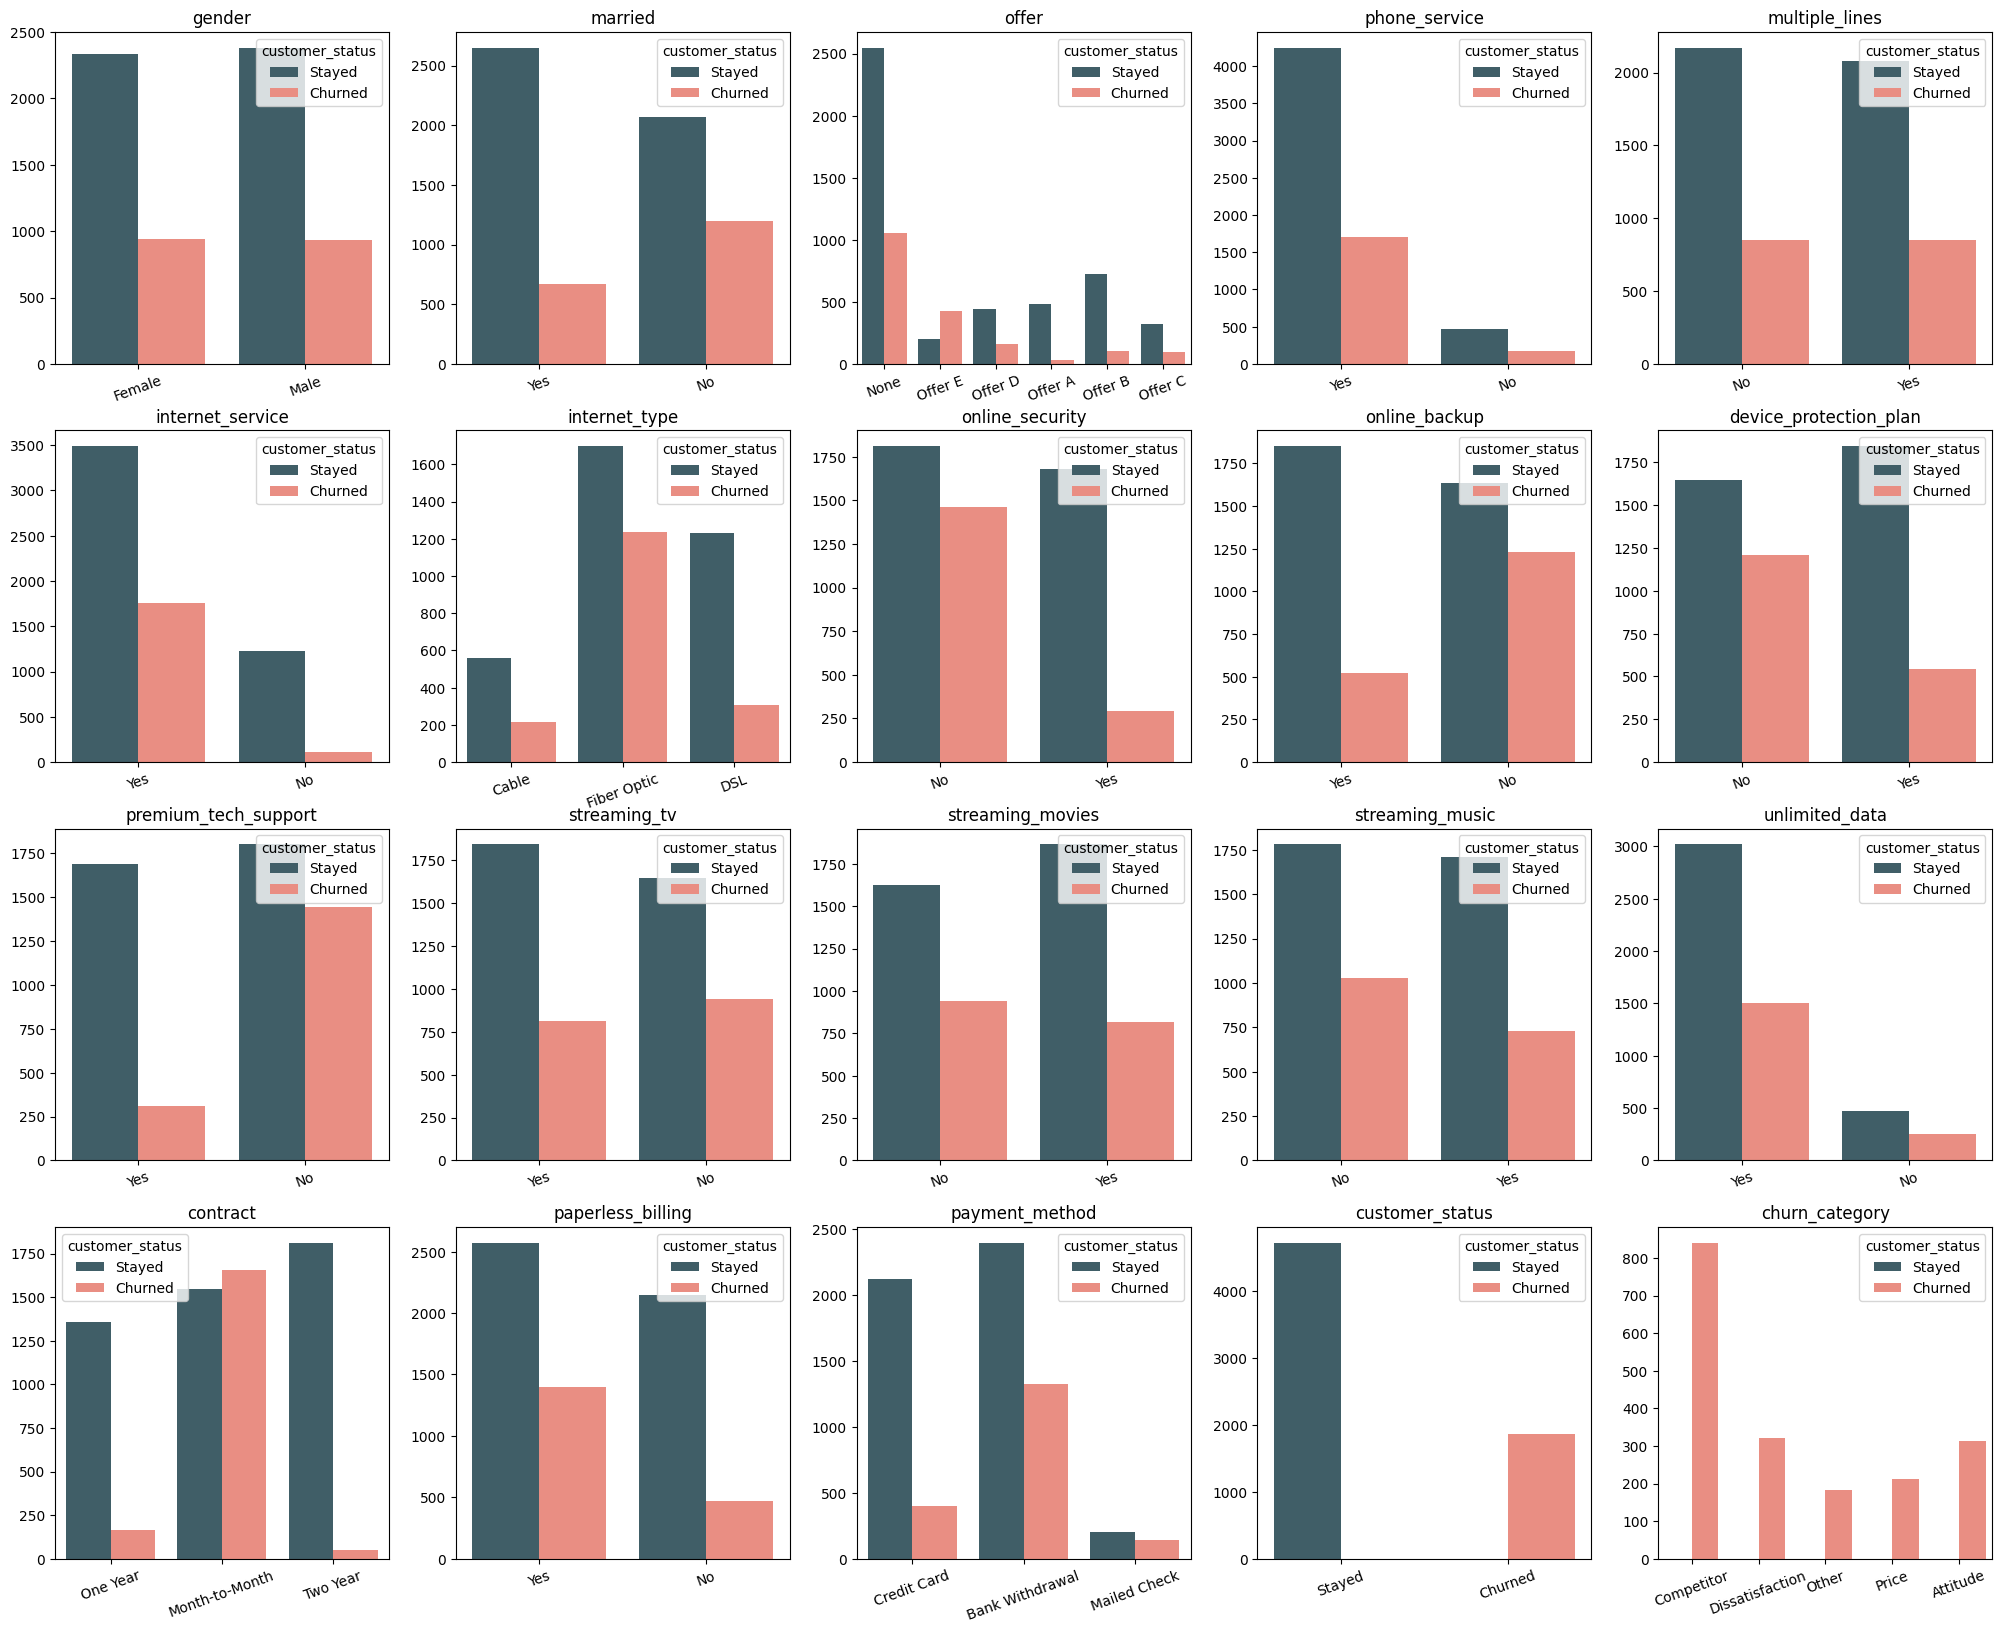

In [11]:
cat = [cname for cname in dfc.columns if dfc[cname].nunique() < 10 and dfc[cname].dtype == "object"]
dfc_cat = dfc[cat]

fig = plt.figure(figsize = (25, 25))

i = 1
for c in dfc_cat.columns:
    plt.subplot(5, 5, i)
    ax = sns.countplot(data = dfc_cat, x = dfc_cat[c], hue = 'customer_status', palette = [c_green, c_orange])
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(c), loc='center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

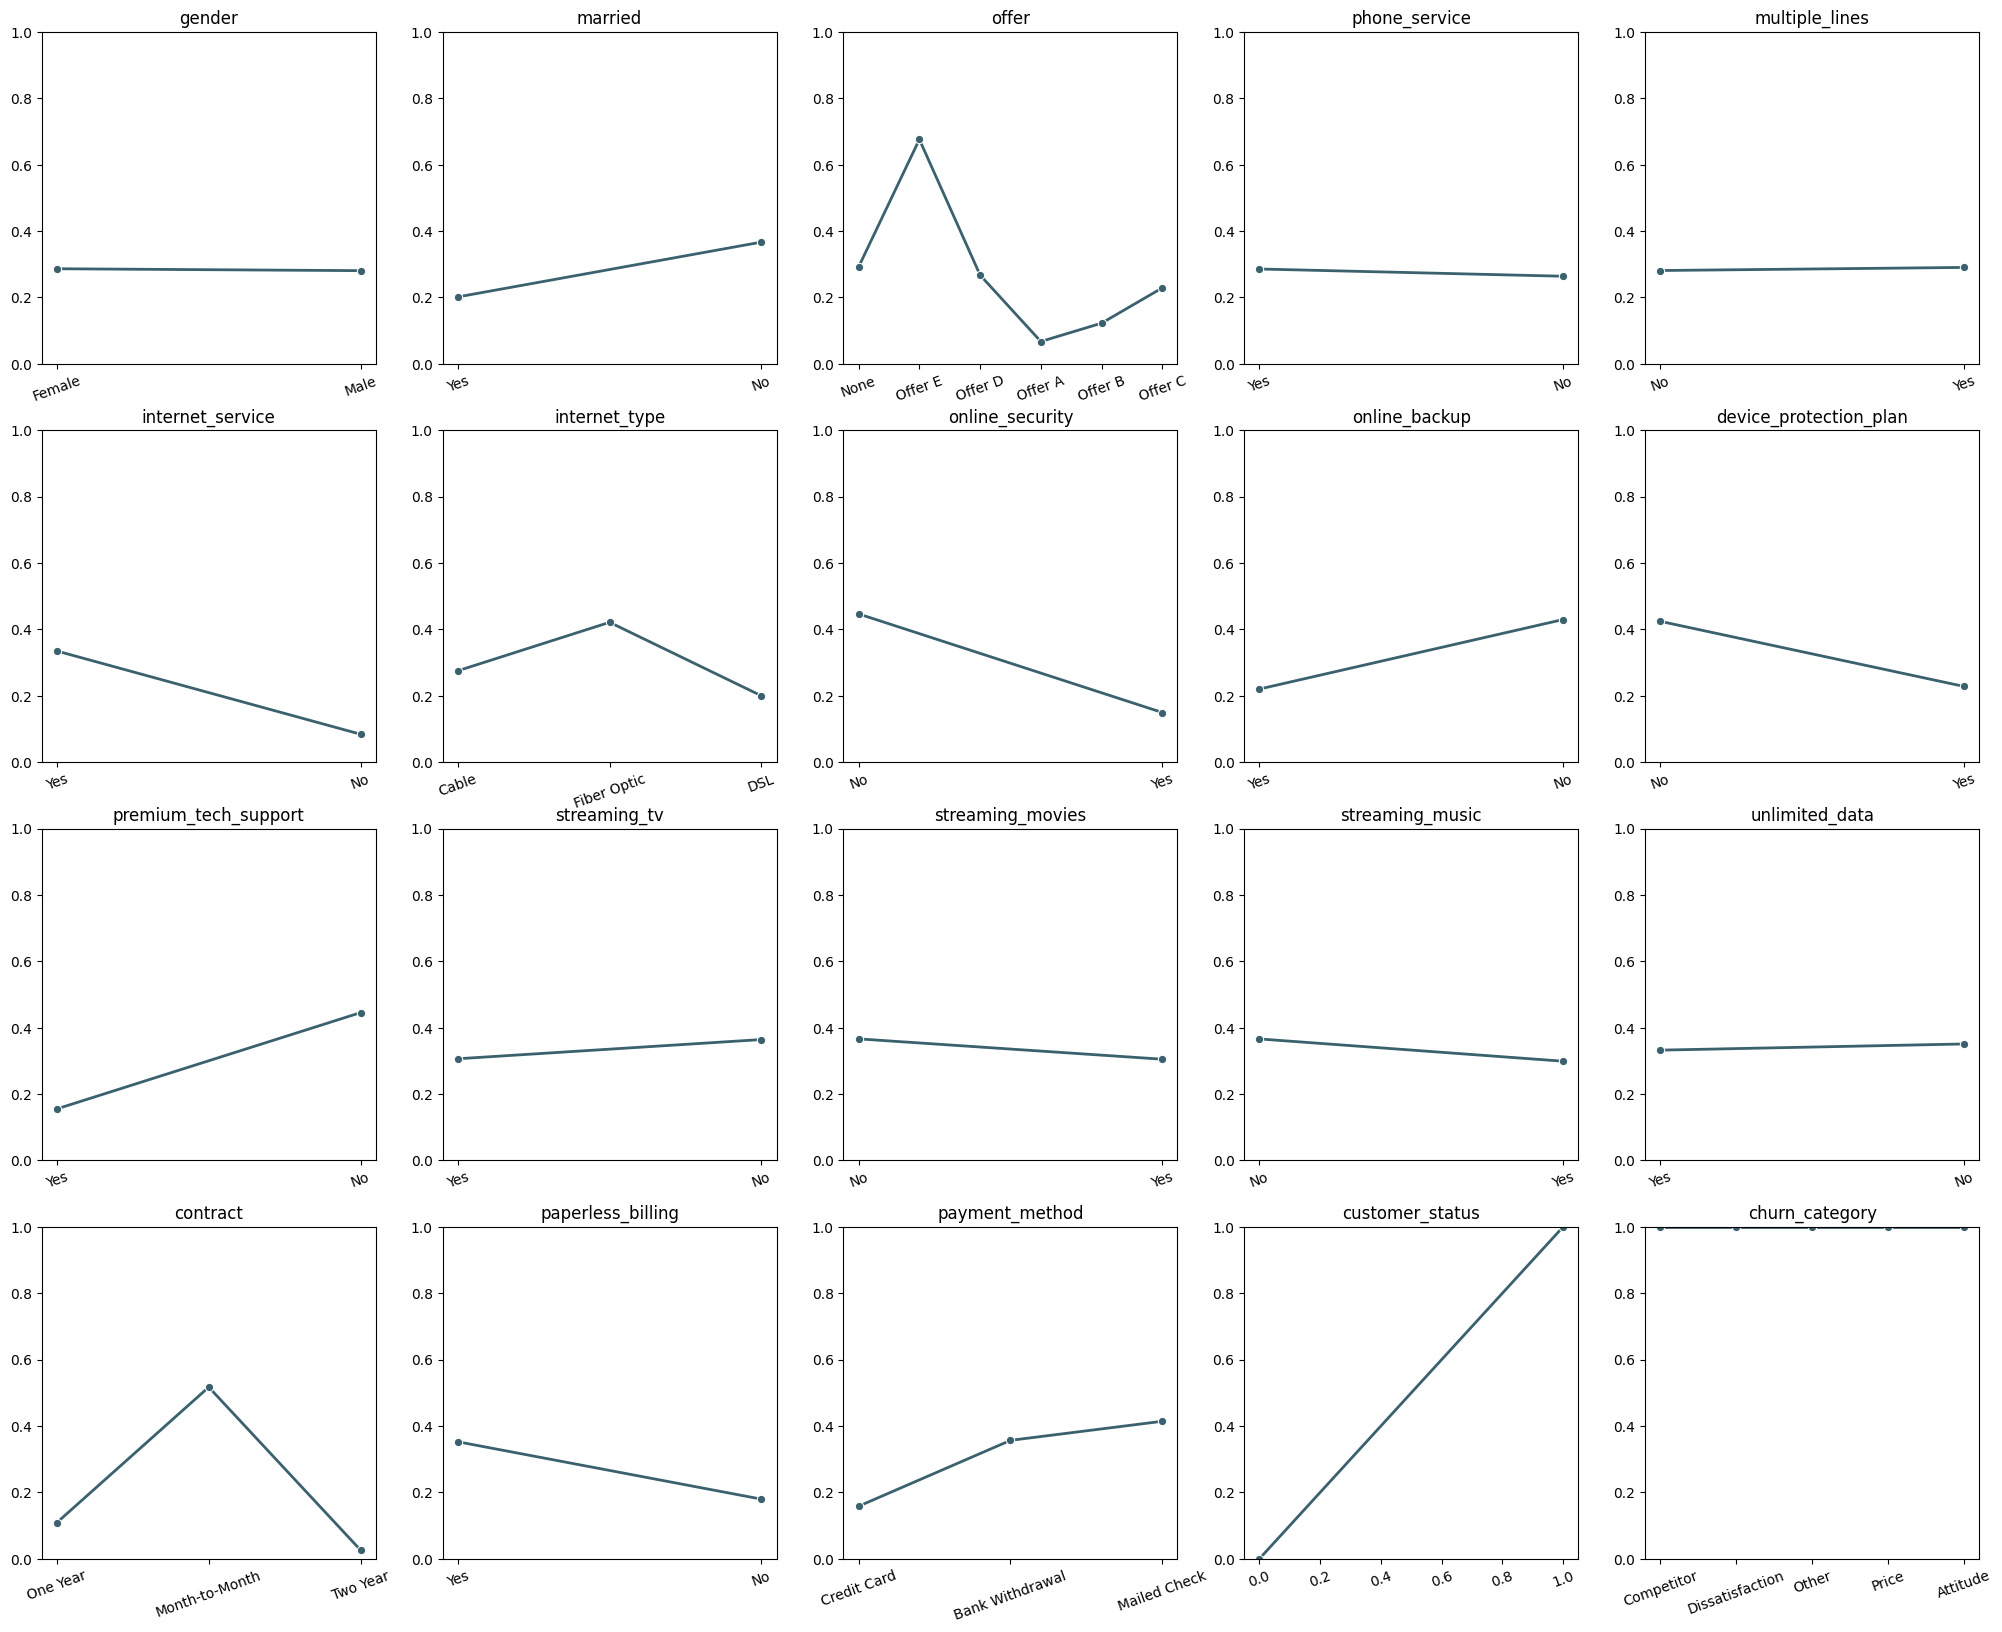

In [12]:
dfc.loc[dfc.customer_status == 'Stayed', 'customer_status'] = 0
dfc.loc[dfc.customer_status == 'Churned', 'customer_status'] = 1
dfc_cat = dfc[cat]
dfc_num = dfc[num]

fig = plt.figure(figsize = (25, 25))

i = 1
for c in dfc_cat.columns:
    plt.subplot(5, 5, i)
    ax = sns.lineplot(data = dfc_cat, x = dfc_cat[c], y= dfc_cat['customer_status'], linewidth = 2, marker = 'o', ci = None, color = c_green)
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(c), loc='center')
    plt.ylim(0, 1)
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

#### Observations

- `tenure_in_months`: Customer churn rate is highest within the first few months (5) of subscribing to the service.
- `total_charges and revenue`: In relation to their short duration of subscription, total amount charged to churned customers are relatively low compared to those who stayed, hence, lower revenue garnered.
- `offer`: Most customers didn't accept marketing offers. The marketing team may want to improve on this low conversion rate. Unfortunately, no information were provided about the complete details of each offer, although we do observe high customer churn rate after subscribing to Offer E.
- `internet_service`. Higher churn rate with subscriptions to internet service. Anecdotally, there are several causes related to internet services that can lead to customer dissatisfaction. One of the most frequent examples include slow internet conncetion.
- `internet_type`: Of the various internet connection types, Fiber Optic is the most popular, for it had the fastest download and upload speeds compared to cable and DSL at the expense of higher prices. However, Fiber Optic users are also the most likely to discontinue the connection service.
- `contract`: It makes sense that contracts set for longer timeframes either up to one or two years discourage the subscribers to discontinue their service. On the contrary, users are likely to churn if they opt to pay at a monthly basis.
- Subsribing to any of the additional internet services (i.e. online security, backup, device protection plan, etc.) appears to considerably reduce the customer churn rate by a certain percentage.

#### 1.3 High Value Customers vs Churned Customers

Customers who contributed above the average revenue of the company and those who stayed are treated as **high-value and loyal customers.** 

In [13]:
avg_revenue = dfc['total_revenue'].mean()
print('Average Revenue Per Customer', avg_revenue)

Average Revenue Per Customer 3235.2180816512373


In [14]:
dfc['high_value'] = 0

more_than_avg_revenue = (dfc['total_revenue'] > avg_revenue)
staying_customers = (dfc['customer_status'] == 0)
dfc.loc[more_than_avg_revenue & staying_customers, 'high_value'] = 'High Value'

/var/folders/tk/wz1yhr411g558rt103cxg_cw0000gn/T/ipykernel_22324/1236441290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['high_value'] = 0
/var/folders/tk/wz1yhr411g558rt103cxg_cw0000gn/T/ipykernel_22324/1236441290.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc.loc[more_than_avg_revenue & staying_customers, 'high_value'] = 'High Value'


In [15]:
print('High Value Counts', dfc.high_value.value_counts())
df_high_value = dfc[dfc.high_value == 'High Value']
print('\n', 'High Value Customers')
df_high_value.head()

High Value Counts 0             4392
High Value    2197
Name: high_value, dtype: int64

 High Value Customers


,gender,age,married,number_of_dependents,city,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,...,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason,high_value
6,Female,67,Yes,0,Lompoc,1,71,Offer A,Yes,9.96,...,109.70,7904.25,0.0,0,707.16,8611.41,0,NaN,NaN,High Value
7,Male,52,Yes,0,Napa,8,63,Offer B,Yes,12.96,...,84.65,5377.80,0.0,20,816.48,6214.28,0,NaN,NaN,High Value
9,Female,43,Yes,1,Sheridan,3,65,None,Yes,28.46,...,90.45,5957.90,0.0,0,1849.90,7807.80,0,NaN,NaN,High Value
11,Female,25,Yes,2,Sunnyvale,2,72,None,Yes,16.01,...,116.80,8456.75,0.0,0,1152.72,9609.47,0,NaN,NaN,High Value
13,Female,32,No,0,La Mesa,0,72,Offer A,Yes,2.25,...,101.30,7261.25,0.0,0,162.00,7423.25,0,NaN,NaN,High Value


##### Let's analyse the profile of high value customers

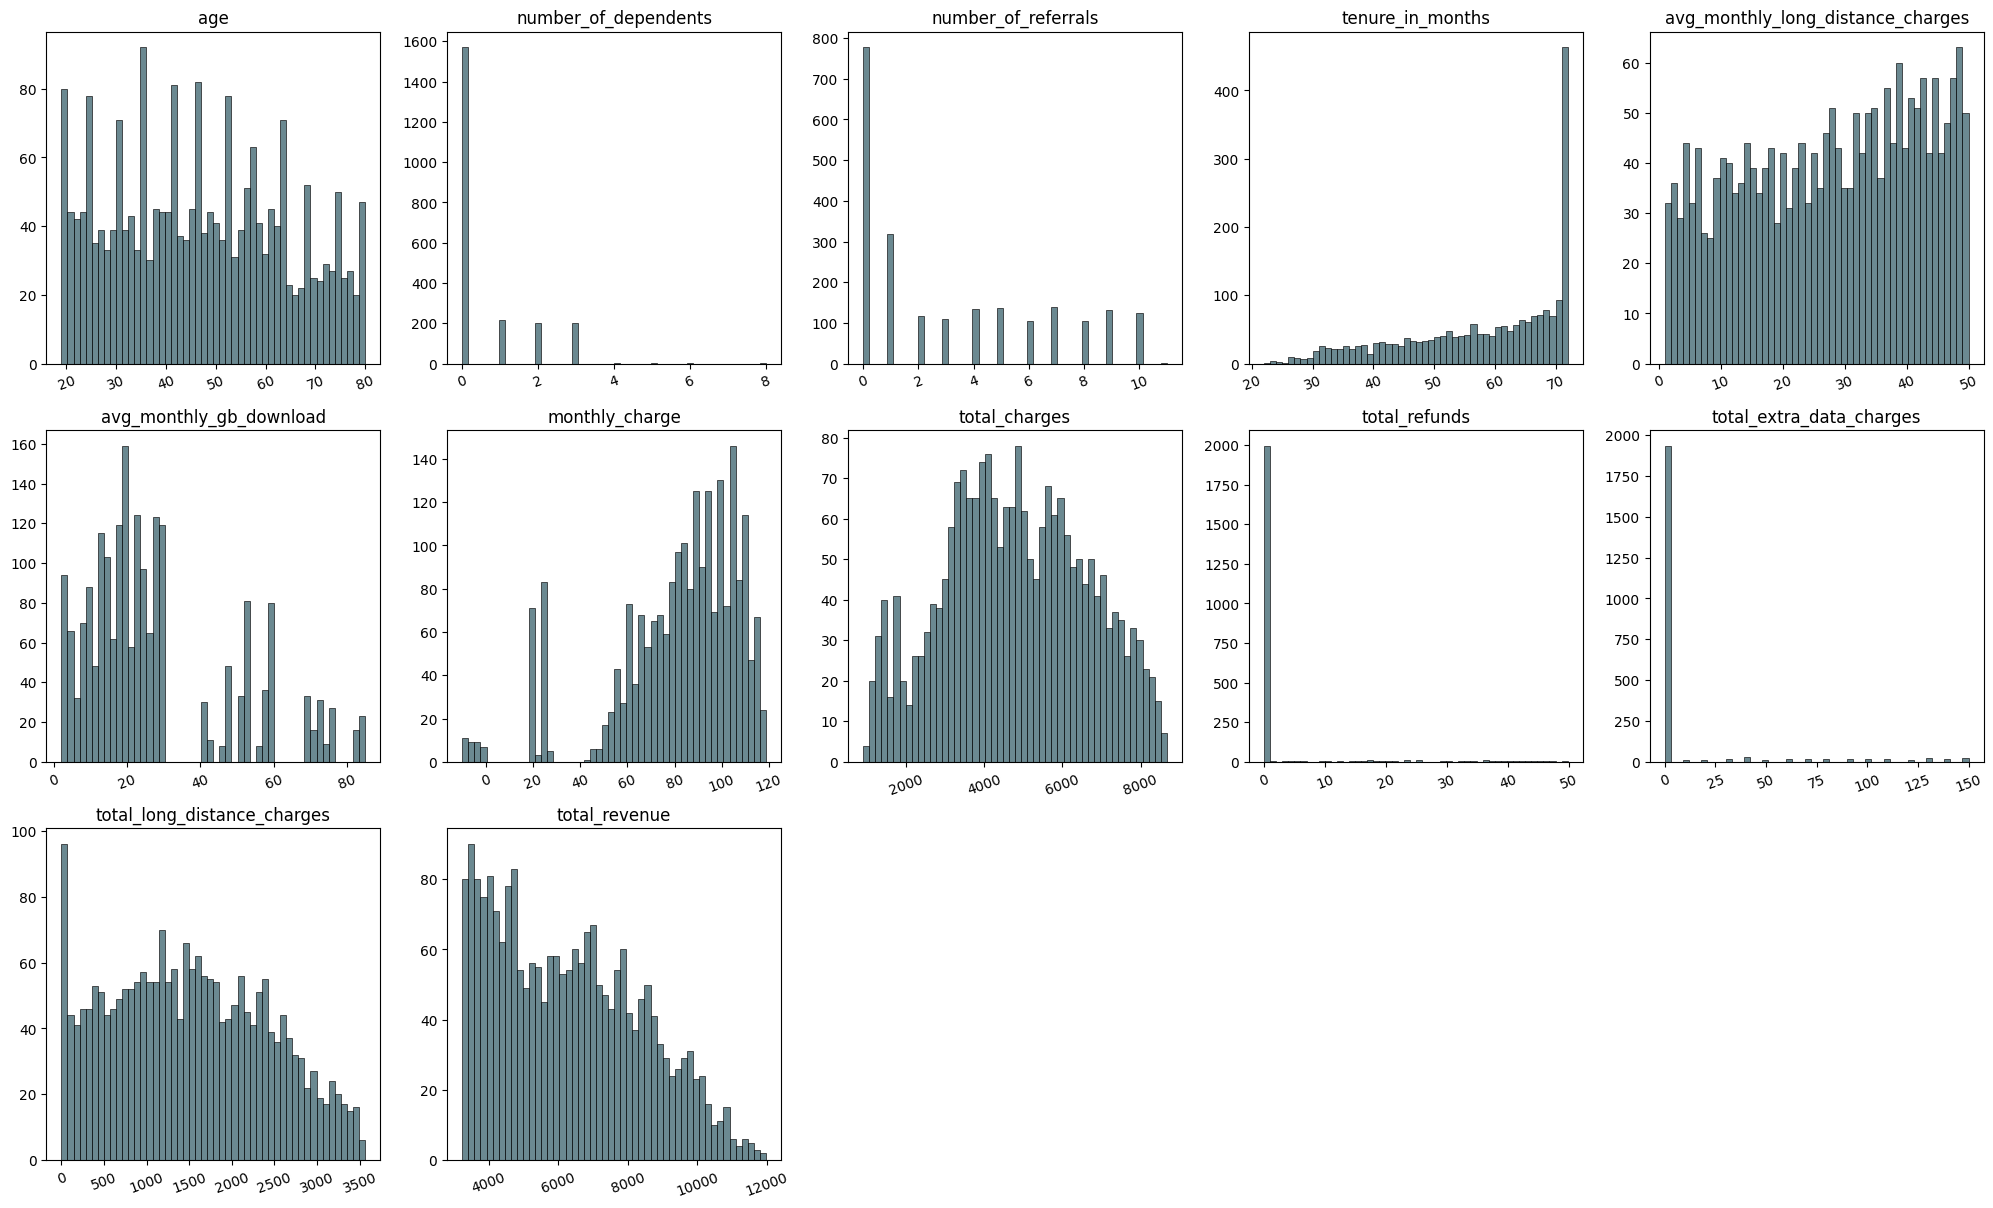

In [16]:
num = [cname for cname in df_high_value.columns if df_high_value[cname].dtype in ['int64', 'float64']]
_ = df_high_value[num]

fig = plt.figure(figsize = (25, 25))

i = 1
for n in _.columns:
    plt.subplot(5, 5, i)
    ax = sns.histplot(x = df_high_value[n], color = c_green, bins = 50)
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

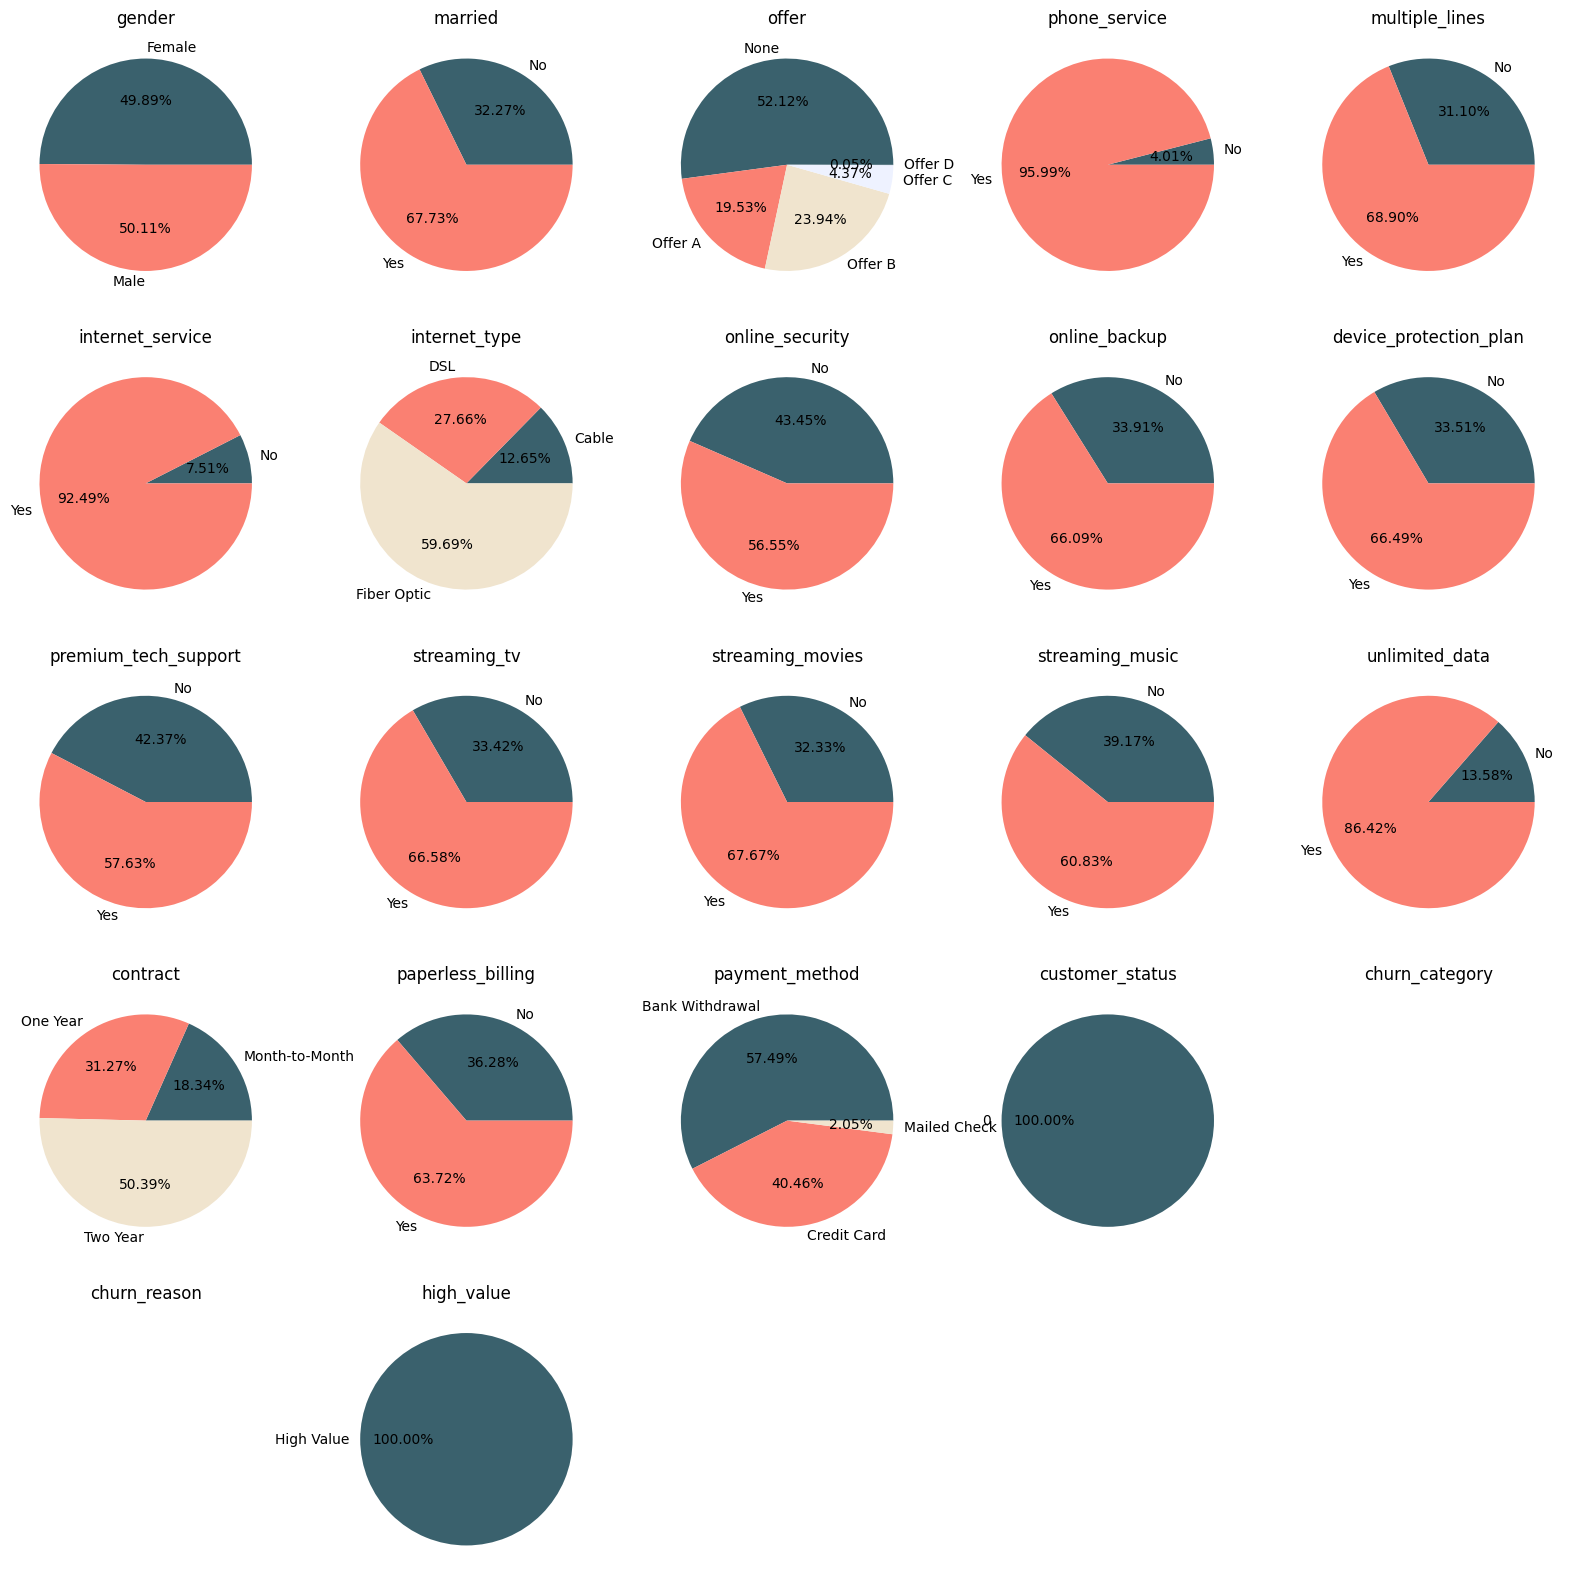

In [17]:
cat = [cname for cname in df_high_value.columns if df_high_value[cname].nunique() < 10 and df_high_value[cname].dtype == "object"]
_ = df_high_value[cat]

fig = plt.figure(figsize = (20, 20))

i = 1
for c in _.columns:
    plt.subplot(5, 5, i)
    ax = df_high_value.groupby([c]).size().plot(kind = 'pie', autopct = '%.2f%%', colors = [c_green, c_orange, c_off_white, '#EEF2FF'])
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(c), loc='center')
    i += 1

**High Value Customers Profile**
- **67.73%** are married.
- They haven't purchased **Offer E.**
- More than half of these customers have subscribed to additional **internet services** (i.e. backup, security, protection plan, tech support) and **streaming services** (TV, movies, music).
- Out of the **81.66%** who are subsribed to long term contracts, **50.39%** opted for the two-year contract, and the remaining **31.27%** went for one year.

##### Let's analyse churned customers profile

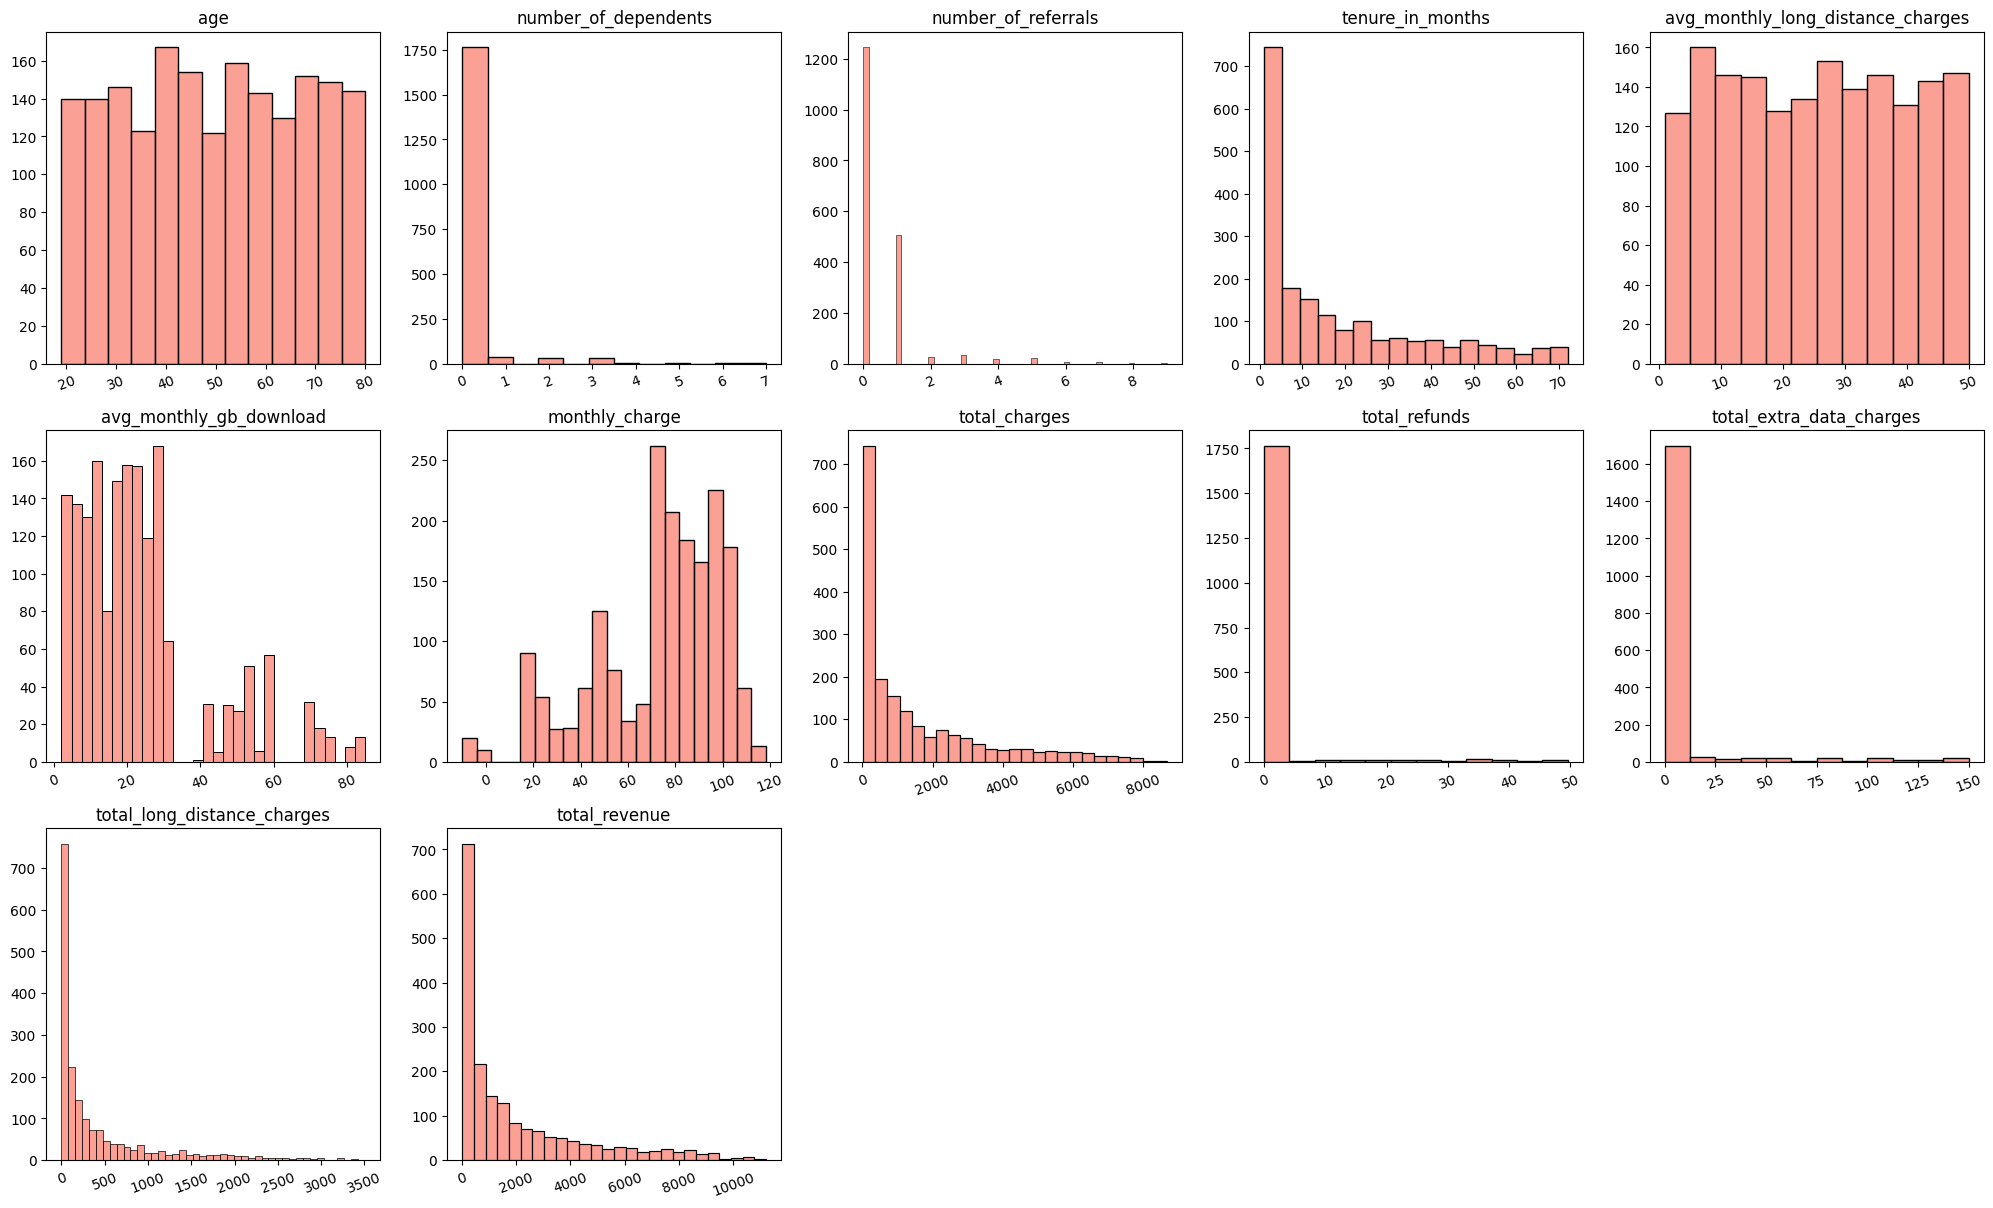

In [18]:
df_churned = dfc.loc[dfc['customer_status'] == 1]

num = [cname for cname in df_churned.columns if df_churned[cname].dtype in ['int64', 'float64']]
_ = df_churned[num]

fig = plt.figure(figsize = (25, 25))

i = 1
for n in _.columns:
    plt.subplot(5, 5, i)
    ax = sns.histplot(x = df_churned[n], color = c_orange)
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

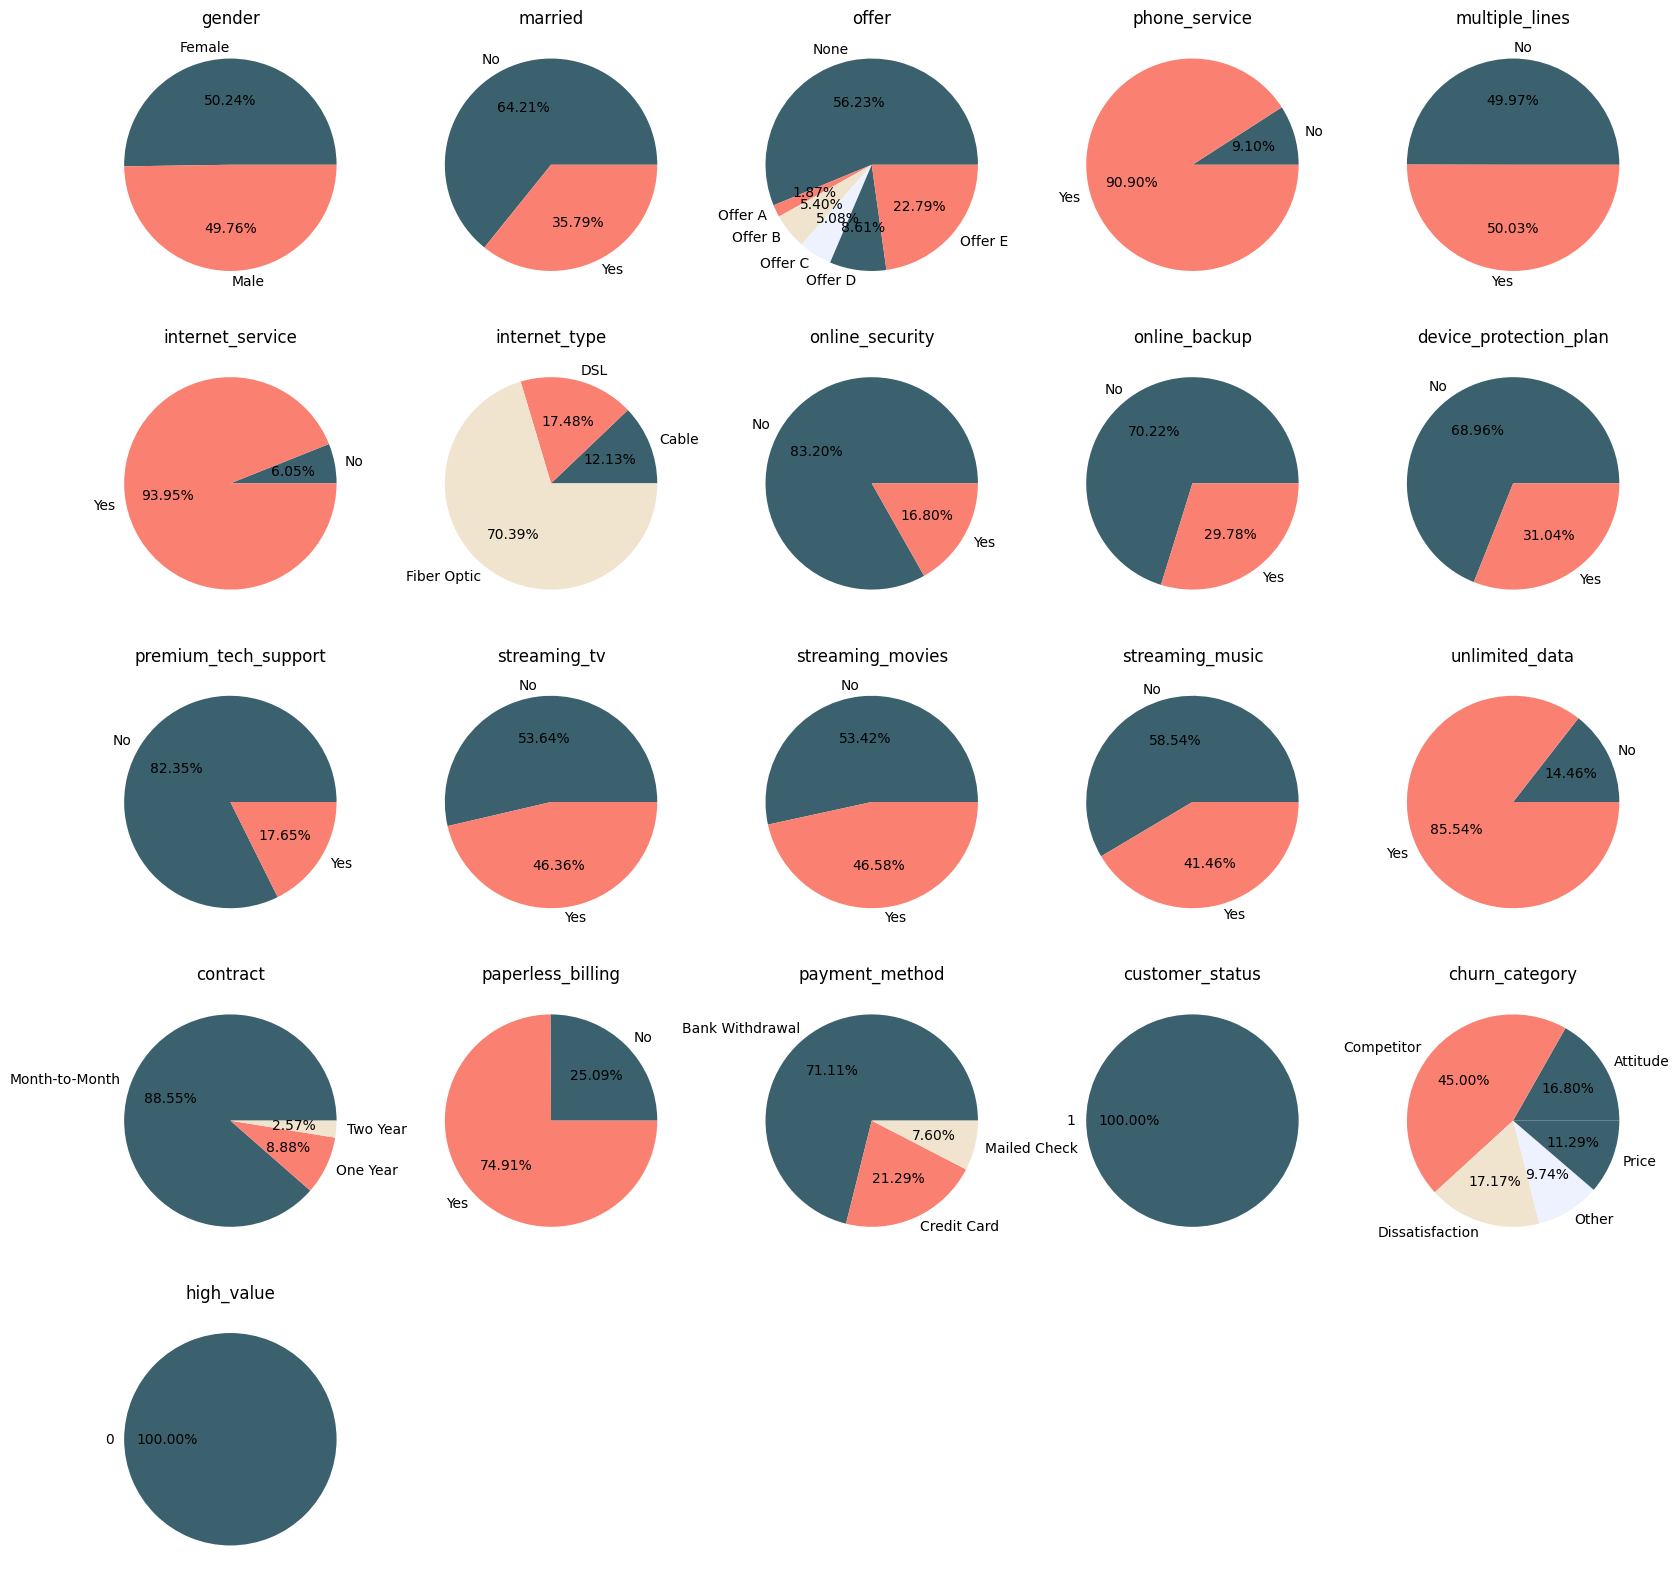

In [19]:
cat = [cname for cname in df_churned.columns if df_churned[cname].nunique() < 10 and df_churned[cname].dtype == "object"]
_ = df_churned[cat]

fig = plt.figure(figsize = (20, 20))

i = 1
for c in _.columns:
    plt.subplot(5, 5, i)
    ax = df_churned.groupby([c]).size().plot(kind = 'pie', autopct = '%.2f%%', colors = [c_green, c_orange, c_off_white, '#EEF2FF'])
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(c), loc='center')
    i += 1

##### Low Value Cusomter Profile

- Only **35.79%** are married.
- **Offer E** appears to be the most popular offer around churned customers. Perhaps the company may want to review and look for potential pain points about this offer. 
- More than half of churned customers haven't subscribed to additional **internet services** and **streaming services**.
-  **88.55%** choose to pay their bills at a monthly basis.

#### Comparison

**What they have in common?**
- Equal distribution in terms of gender.
- **Fiber optic** internet service is popular among both customer groups.
- Majority enjoy **unlimited data.**
- Majority prefers to receive **paperless billing** and pay the bills by **bank withdrawal**.

#### 1.4 Recommendations to Alleviate Churn

1. **Concentrate marketing efforts on the highest valuable customers** (top 33% of the customers). This specific group of customers are known for being big spenders and their loyalty to the company. Consider creating an exclusive loyalty program filled with exclusive rewards just for them. 
2. The most common cause for churning is due to the **superiority of the competitors' brand offers and services in terms of price and quality.** This underscores the company's attention to review the components of its value proposition and define its competitive advantage over competitors.
3. **Converting current month-to-month users to long term contract subscribers** have been statistically shown to reduce the customer churn rate. Amplify the conversion rate by providing content about the key functional benefits of applying for the subscription model.
4. **Attractively introduce the additional internet and streaming services to internet users.** There is a higher chance that they will retain and become high value customers after purchasing these add-on offers.
5. **Consider reviewing Offer E and identify its pain points which resulted in high churn rates**. Carefully assess across other related marketing offers that performed well and make pertinent changes and improvements out of it. 

### Section 2 - Which customers matter?

In this section we further categorize the high-value customers to understand them better so that the company can cater to their needs better.

They are mainly 3 high-value customer groups that we can distinguish given our data.
1. **Big Spenders.** Most of the company's revenue growth is contributed by the large spenders. They put their hands on products and services even if they are expensive as long as they see the worth in its quality.
2. **Word-Of-Mouth Marketers.** Also known as influencers, they are incredible assets for contributing to the organic traffic of new users. They generously introduce the company's products and services to their families and friends.
3. **Loyal Customers.** They have stayed as loyal customers longer than most of the customers.

In [20]:
df = pd.read_csv('./data/telecom_customer_churn.csv')
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [21]:
df.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace = True)
df.drop(columns = ['customer_id', 'zip_code', 'latitude', 'longitude'], inplace = True)
df.head()

,gender,age,married,number_of_dependents,city,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,Female,37,Yes,0,Frazier Park,2,9,None,Yes,42.39,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,Male,46,No,0,Glendale,0,9,None,Yes,10.69,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,33.65,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,27.82,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,Female,75,Yes,0,Camarillo,3,3,None,Yes,7.38,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


Customers who contributed more than the average revenue will be regarded as **Big Spenders.**

In [22]:
avg_revenue = df['total_revenue'].mean()

df['big_spender'] = 0
df.loc[ df['total_revenue'] >=  avg_revenue, 'big_spender'] = 1

Customers whose had more than or equal to 2 referrals will be regarded as **WOM Marketers.**

In [23]:
df['wom'] = 0
df.loc[ df['number_of_referrals'] >= 2 , 'wom'] = 1

Customers are **loyal** if they have stayed for more than the average tenure of all customers. 

In [24]:
avg_tenure = df['tenure_in_months'].mean()

df['loyal'] = 0
df.loc[ (df['tenure_in_months'] >= avg_tenure) & (df['customer_status'] == 'Stayed') , 'loyal'] = 1

Collect all these into High Value DF

In [25]:
high_value = df[['big_spender', 'wom', 'loyal']]
high_value.head()

,big_spender,wom,loyal
0,0,1,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,1,0


#### 2.2 Analysis of High Value Customers

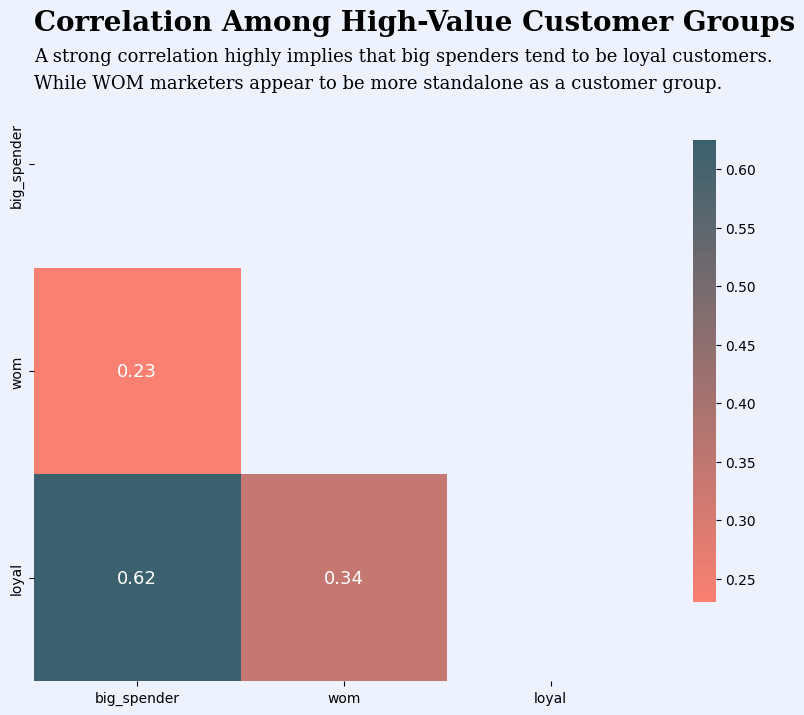

In [26]:
import matplotlib.colors
plt.subplots(figsize=(10, 10), facecolor = '#EEF2FF')
mask = np.triu(np.ones_like(high_value.corr()))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [c_orange, c_green])
ax = sns.heatmap(high_value.corr(), cmap=cmap, mask=mask, annot=True, annot_kws={"fontsize":13}, square=True, cbar_kws={"shrink": .6})
ax.set_facecolor('#EEF2FF')

ax.text(0, -.15, 
         'Correlation Among High-Value Customer Groups', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )
ax.text(0, 0, 
         'A strong correlation highly implies that big spenders tend to be loyal customers.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

ax.text(0, .13, 
         'While WOM marketers appear to be more standalone as a customer group.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

plt.show()

In [27]:
high_value_rev = df[(df.big_spender == 1) & (df.wom == 1) & (df.loyal == 1)]['total_revenue'].sum()

total_rev = df['total_revenue'].sum()

print('High Value Customers Revenue', high_value_rev)
print('Total Revenue', total_rev)
print(f'Percentage contribution of high level customers: {high_value_rev / total_rev * 100:.2f}%')

High Value Customers Revenue 7211290.24
Total Revenue 21371131.69
Percentage contribution of high level customers: 33.74%


**33.74%** of revenue is contributed by high-value customers who are big spenders, wom marketers, and loyal.

##### Let's analyse the Big Spenders

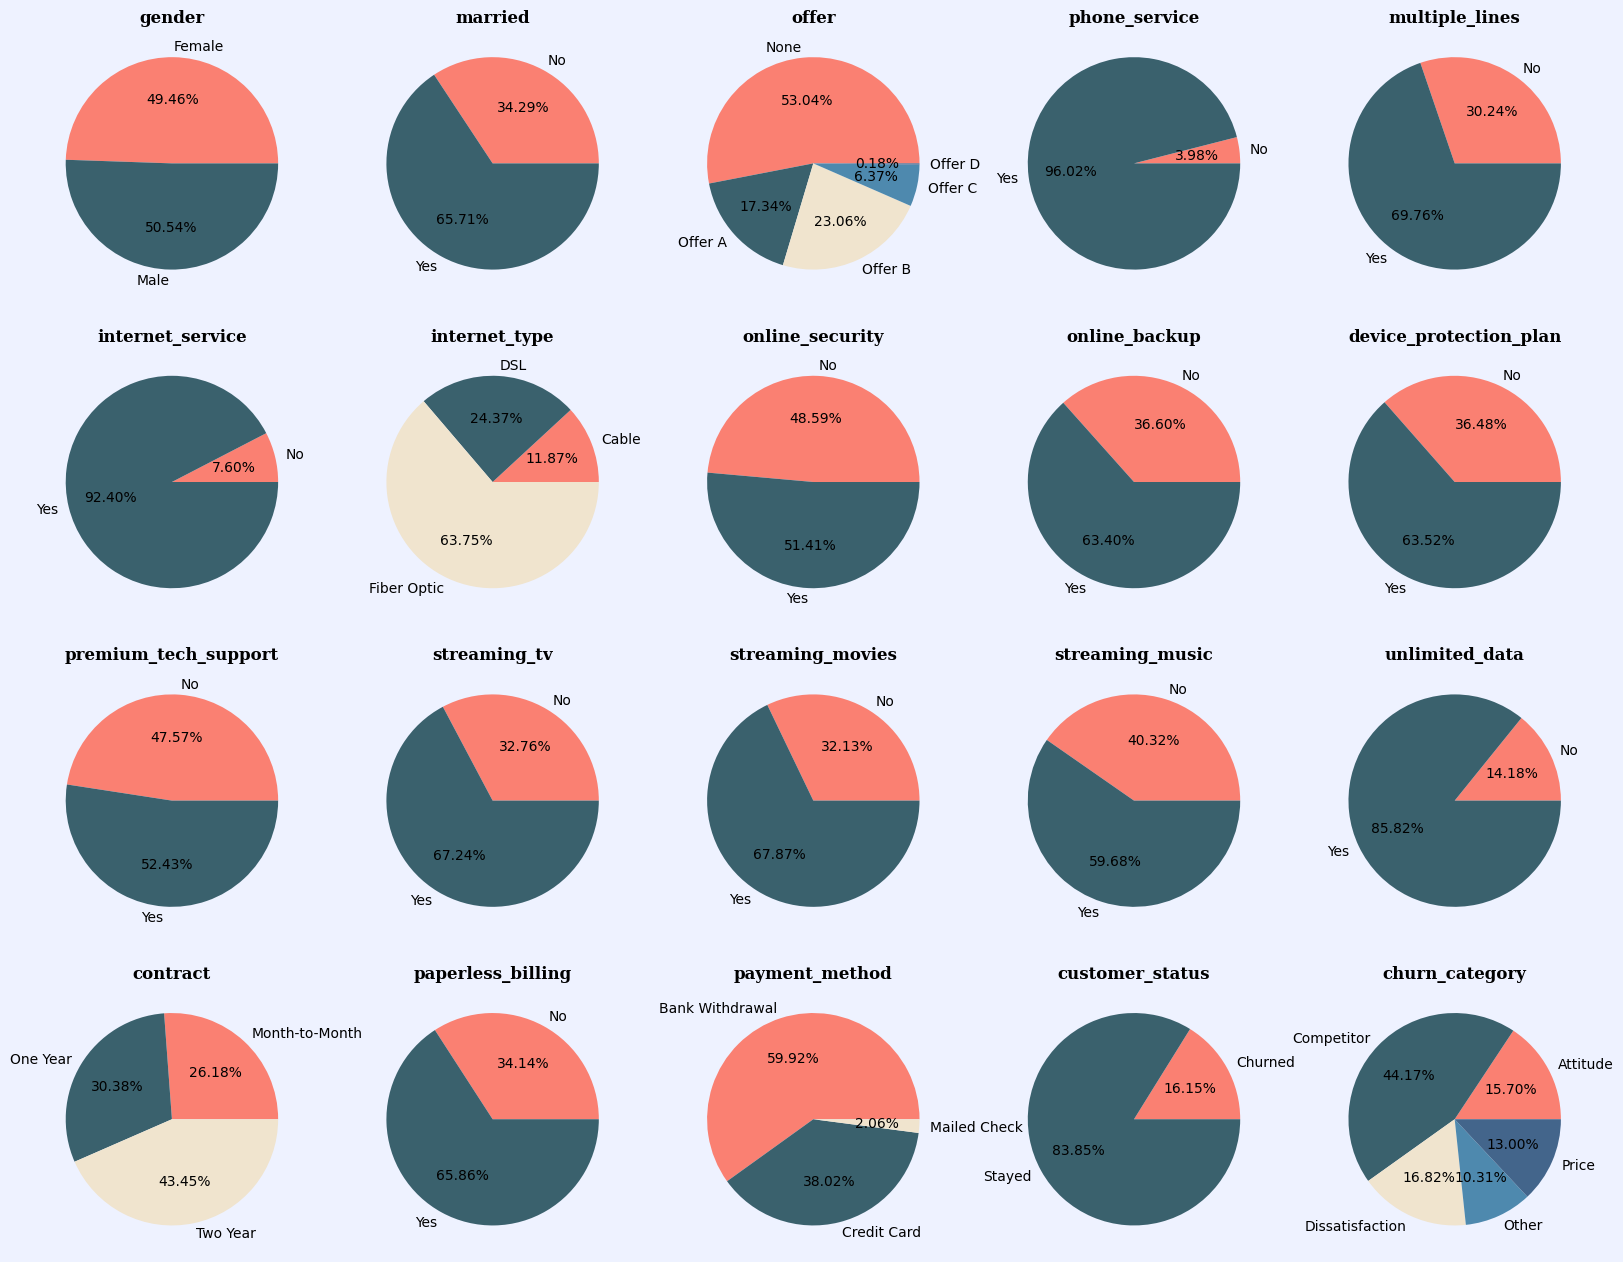

In [31]:
cat = [cname for cname in df.columns if df[cname].nunique() < 10 and df[cname].dtype == "object" ]
_ = df[cat]
df_big_spender = df[df.big_spender == 1]

fig = plt.figure(figsize = (20, 20), facecolor = '#EEF2FF')

i = 1
for c in _.columns:
    plt.subplot(5, 5, i)
    ax = df_big_spender.groupby([c]).size().plot(kind = 'pie', autopct = '%.2f%%', colors = [c_orange, c_green, c_off_white, '#4E89AE', '#43658B'])
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(c), loc='center', font = 'serif', fontweight = 'bold', fontsize = 12)
    i += 1

plt.show()

Observations:

- Approximately 2/3 of the customers are married.
- Around half of the customers indulged marketing offers by the company with the exception of Offer E.
- Almost 2/3 are subscribed to Fiber Optic, known for its fast connection speeds at the cost of higher expenses.
- 2x more likely to enjoy additional internet services such as online backup, protection plan, and other streaming related services.
- 3x more likely to subscribe to long term contracts over settling payments at a month-to-month basis.
- It is unfortunate that 16.15% of big spenders have churned, mostly due to the more attractive offers from competitors.

##### Let's analyse the Word-of-Mouth Marketers

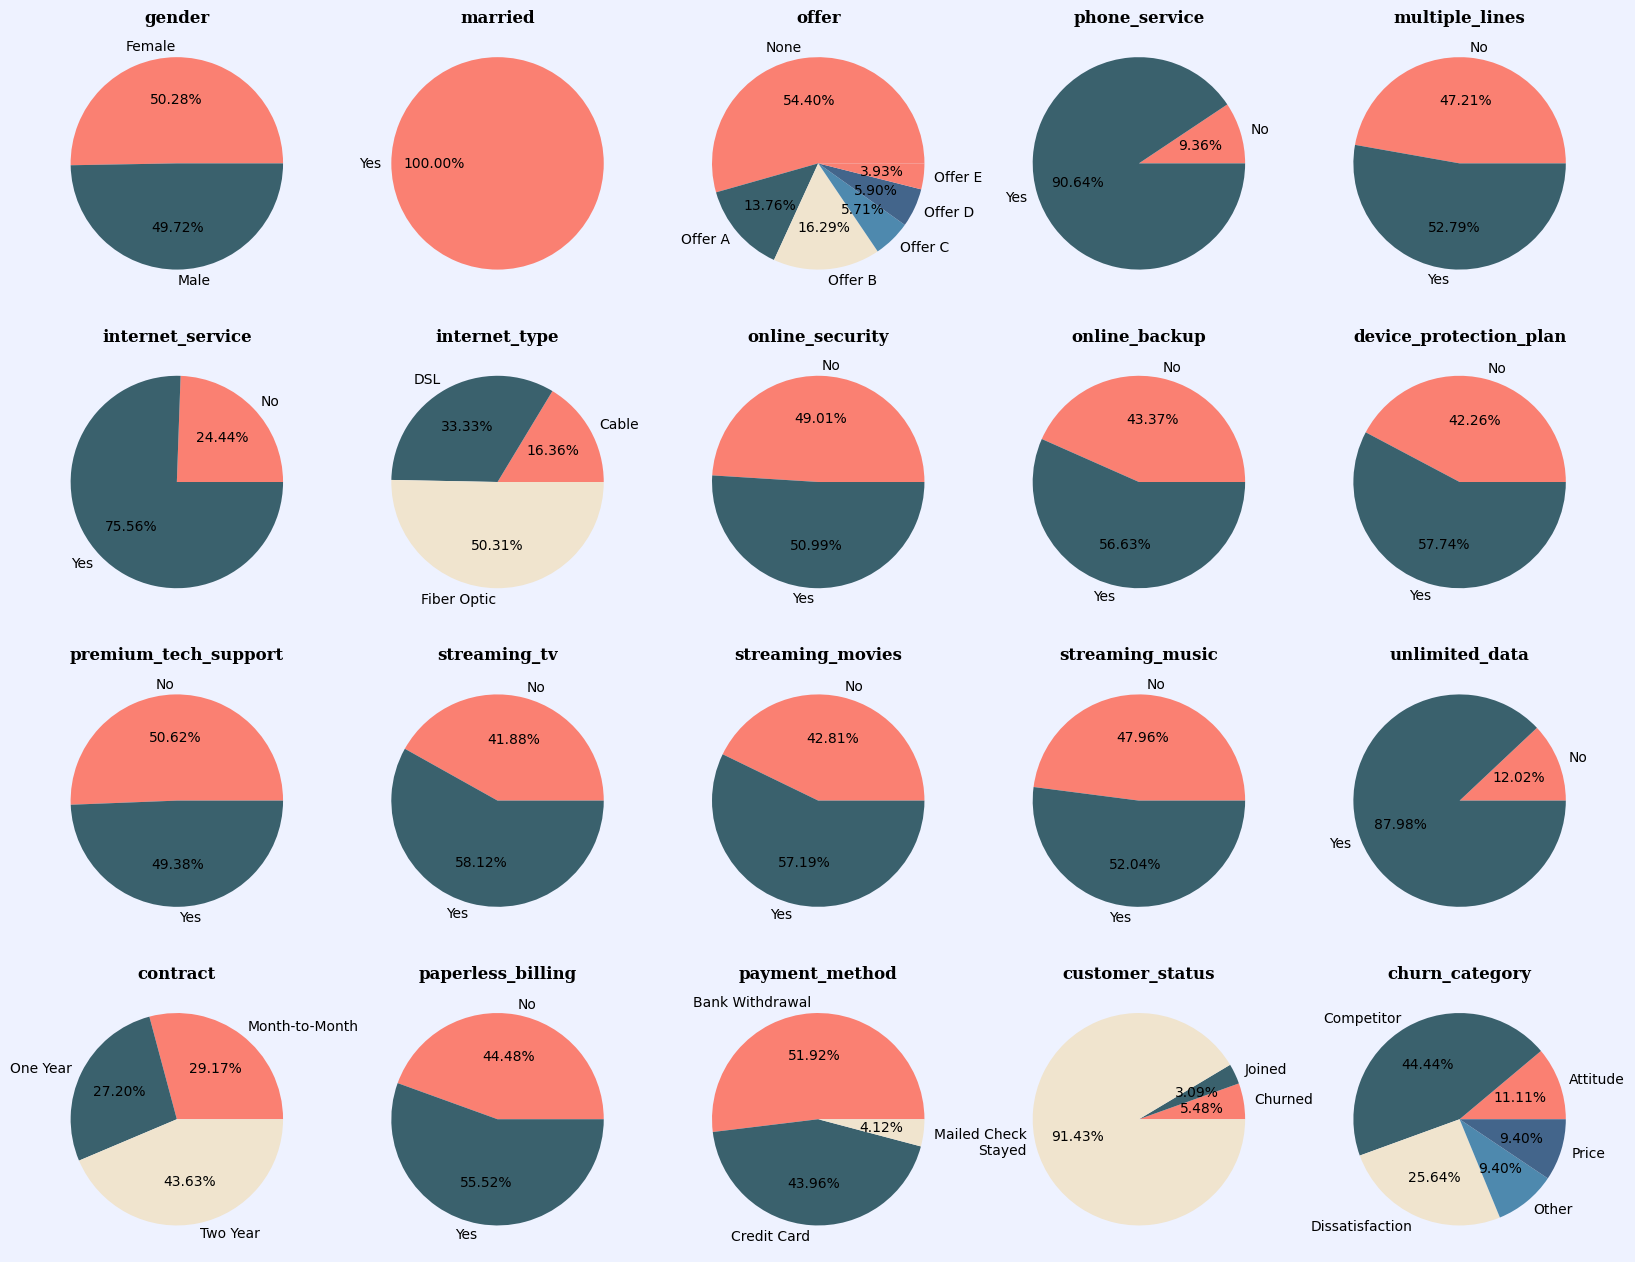

In [32]:
cat = [cname for cname in df.columns if df[cname].nunique() < 10 and df[cname].dtype == "object"]
_ = df[cat]
df_wom = df[df.wom == 1]

fig = plt.figure(figsize = (20, 20), facecolor = '#EEF2FF')

i = 1
for c in _.columns:
    plt.subplot(5, 5, i)
    ax = df_wom.groupby([c]).size().plot(kind = 'pie', autopct = '%.2f%%', colors = [c_orange, c_green, c_off_white, '#4E89AE', '#43658B'])
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(c), loc='center', font = 'serif', fontweight = 'bold', fontsize = 12)
    i += 1

Observations:
- All customers are married.
- Offer E appears to have been enjoyed by a very small percentage of this customer group, which isn't a thing for Big Spenders.
- Over half are Fiber Optic users.
- Likewise big spenders, they also enjoy additional internet services such as online backup, protection plan, and other streaming related services
(excluding streaming music).
- 5.48% have churned while 3.09% are newcomers.

##### Let's analyse loyal customers:

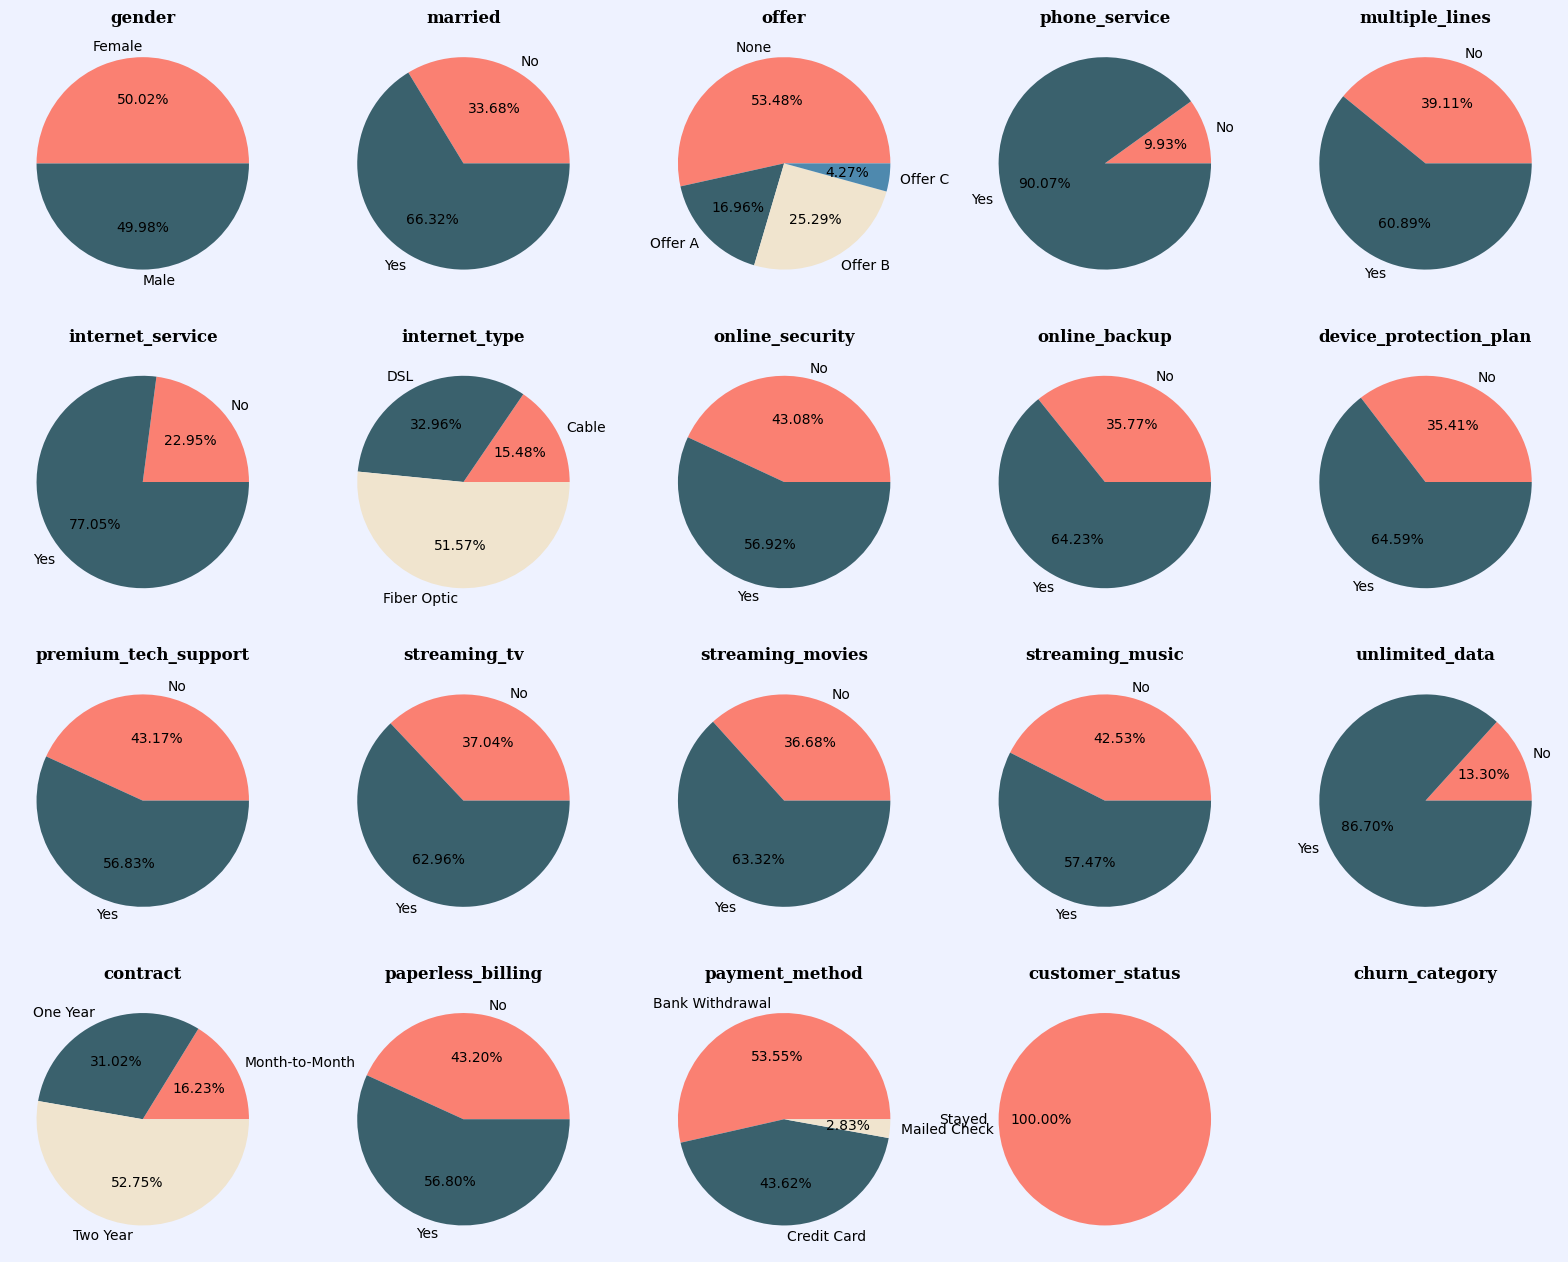

In [33]:
cat = [cname for cname in df.columns if df[cname].nunique() < 10 and df[cname].dtype == "object"]
_ = df[cat]
df_loyal = df[df.loyal == 1]

fig = plt.figure(figsize = (20, 20), facecolor = '#EEF2FF')

i = 1
for c in _.columns:
    plt.subplot(5, 5, i)
    ax = df_loyal.groupby([c]).size().plot(kind = 'pie', autopct = '%.2f%%', colors = [c_orange, c_green, c_off_white, '#4E89AE', '#43658B'])
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(c), loc='center', font = 'serif', fontweight = 'bold', fontsize = 12)
    i += 1

Observations:
- Only Offers A, B, and C were accepted by these users.
- Over half are Fiber Optic users.
- Almost 2x more likely to subsribe to internet services such as online backup, protection plan, and other streaming related services.

### 2.3 Recommendations


After generating so much valuable insights, we can now draft a series of recommendations that aim to **retain these High-Value Customers** that we have identified by engaging and establishing valuable and continuous relationships with them. After all, they contribute significant value for the company.

*1. Big Spenders*

- **Establish the company's competitive advantage.** Price is not an issue to them, and they are the type who would get their hands on expensive products and services as long as they deem it worth for its quality. Pain points arise when their expectations weren't met, which explains the **16% customer churn rate.** As a result, they switch to other competitors' brand and services that are perceived more superior. 
- **Convert big spenders to loyal customers,** Big spenders are more likely to become loyal customers later on, upon knowing that 78% of big spenders are loyal customers. This underscores the company's need to give them the attention they deserve. Make them a priority when it comes to customer service. Personalizing and enhancing their service experiences with more attractive marketing offers, and be the first to attend to their concerns and service failure they encounter.
- **Boost the attractiveness of marketing offers.** As it stands, over half of the customers don't accept any offers by the company. To be specific, Offer E was never a choice among the big spenders. The company may want to review about the package of Offer E, and what appears to be the pain points that led to significantly high customer churn rate of E.

*2. WOM Marketers*

- **Marketing towards Married couples.** 100% of the customers who frequently engage in sending referrals are by married people. To some extent, the key to increasing referral traffic lies in creating marketing campaigns that appeal to newly weds/married couples. Other common and necessary means to increase customer engagement and referrals is to expand digital presence in social media.

*3. Loyal Customers*

- **Loyal programs.** This is a clear opportunity to offer experiential rewards to customers to keep them engaged and committed to your long term service. Make the most out of customers' data to tailor offering that fit their needs. For example, since they enjoy streaming services, reflect on that moving forward.
- **Be proactive.** Create and send out surveys with the intention to understand the initial danger signs of customer churning among loyal customers. Make them feel that they are a part of the community and that their voices are heard and acknowledged. Take this opportunity to offer a better service plan that highly reflect their needs.

### Section - 3 Building a Predictive Model